Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
import os
print("Current Working Directory:", os.getcwd())
print("Files in this directory:", os.listdir())


Current Working Directory: c:\Users\LENOVO\Downloads\ML-Project-8-Gold-Price-Prediction-WebApp-main\ML-Project-8-Gold-Price-Prediction-WebApp-main
Files in this directory: ['gold_price_prediction_model.sav', 'Gold_Price_Prediction_WebApp.py', 'Project 8. Gold Price Data.csv', 'Project 8. Gold Price Prediction.ipynb', 'README.md', 'requirements.txt', 'venv']


Data Collection & Preprocessing

In [3]:
gold_data = pd.read_csv('Project 8. Gold Price Data.csv')


In [4]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting info about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# statistical measure
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
gold_data.drop(['Date'], axis=1,inplace=True)

In [11]:
# correlation
correlation = gold_data.corr()

<Axes: >

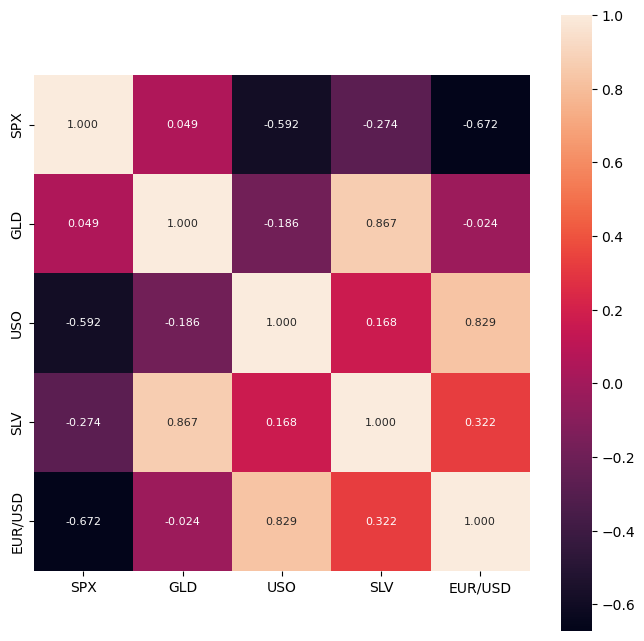

In [12]:
#construction of heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation , cbar = True , square = True , fmt='.3f' , annot = True , annot_kws={'size':8})

In [13]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14900\805650377.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

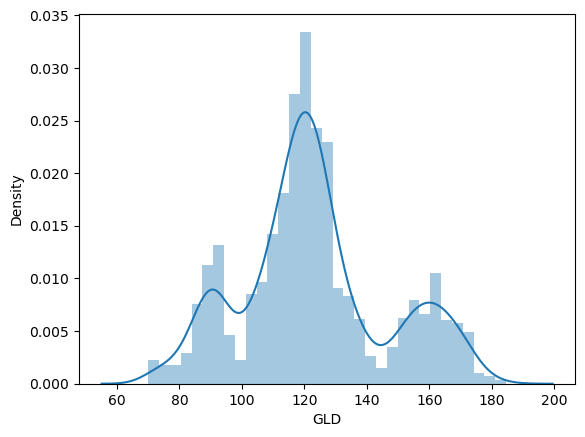

In [14]:
#checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'])

Splitting the features and target

In [15]:
X = gold_data.drop(['GLD'], axis=1)
Y = gold_data['GLD']

In [16]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data in train and test

In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

Model Training : Random Forest Regresser

In [18]:
regressor = RandomForestRegressor(n_estimators = 100)

In [19]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [20]:
#predection on test data
test_data_prediction = regressor.predict(X_test)

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test , test_data_prediction)
print('R Squared Error:', error_score)

R Squared Error: 0.9891940107044458


Compare the actual values and predicted values

In [22]:
Y_test = list(Y_test)

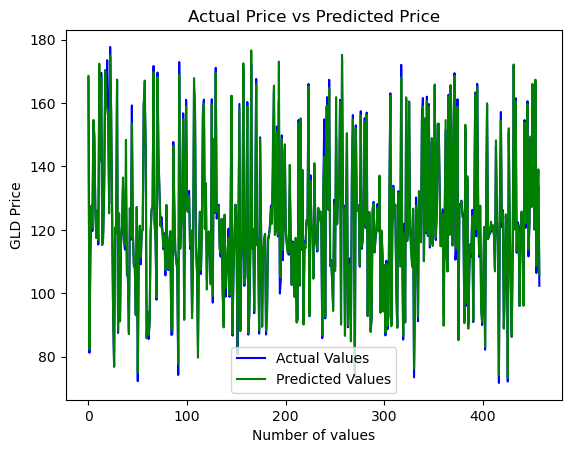

In [23]:
plt.plot(Y_test, color='blue', label ='Actual Values')
plt.plot(test_data_prediction , color = 'green', label = 'Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

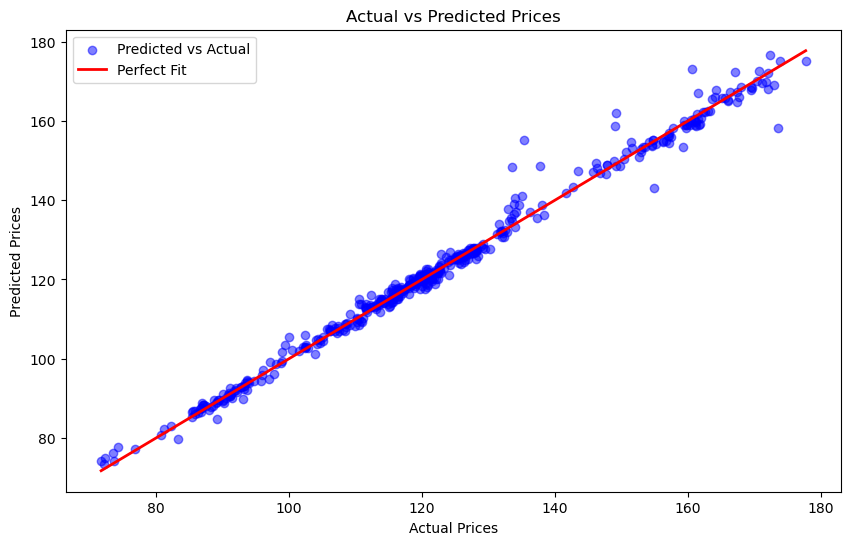

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

Predictive System

In [25]:
input_data=(1378.550049,72.349998,16.818001,1.486503)

#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The Predcited price of Gold : ', prediction[0])

The Predcited price of Gold :  90.70120102000004


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Saving the Model

In [26]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Example model for gold price prediction

# Example training data (make sure to replace with your actual data)
X_train = np.array([[1378.550049, 72.349998, 16.818001, 1.486503], [1500.000000, 70.000000, 18.000000, 1.500000]])
y_train = np.array([1800, 1900])  # Example target values (prices)

# Train the model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Saving the trained model to a file
filename = "gold_price_prediction_model.sav"
pickle.dump(regressor, open(filename, 'wb'))

# Loading the saved model
loaded_model = pickle.load(open('gold_price_prediction_model.sav', 'rb'))

# Input data for prediction (example)
input_data = (1378.550049, 72.349998, 16.818001, 1.486503)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making the prediction
prediction = loaded_model.predict(input_data_reshaped)

# Displaying the predicted gold price
print('The Predicted price of Gold: ', prediction[0])


The Predicted price of Gold:  1825.0


In [ ]:
import numpy as np  # Add this import statement

input_data = (1378.550049, 72.349998, 16.818001, 1.486503)

# changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

print('The Predicted price of Gold : ', prediction[0])


The Predicted price of Gold :  1825.0
